In [64]:
from google.colab import files
files = files.upload()

Saving train.csv to train (3).csv
Saving test.csv to test (3).csv


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
#import dataset
data_train = pd.read_csv('train.csv')
data_train.shape

(550068, 12)

In [67]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [68]:
data_test = pd.read_csv('test.csv')
data_test.shape

(233599, 11)

In [69]:
df = pd.concat([data_train, data_test])
df.shape


(783667, 12)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [71]:
df.drop(['User_ID'],axis=1,inplace=True)


In [72]:
df["Gender"]= df["Gender"].map({"F":1,"M":0})

In [73]:
df["Gender"]

,Gender
0,1
1,1
2,1
3,1
4,0
...,...
233594,1
233595,1
233596,1
233597,1


In [74]:
#Handling Age

# df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [75]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [76]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
df = pd.concat([df,city],axis=1)
df.drop(['City_Category'],axis=1,inplace=True)

In [77]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,0,6,16,4+,0,8,NaN,NaN,7969.0,False,True


In [78]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [79]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [80]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

,Product_Category_2
0,8.0
1,6.0
2,8.0
3,14.0
4,8.0
...,...
233594,8.0
233595,8.0
233596,5.0
233597,16.0


In [81]:
df['Product_Category_2'].isnull().sum()

np.int64(245982)

In [82]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [83]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

,Product_Category_3
0,16.0
1,14.0
2,16.0
3,16.0
4,16.0
...,...
233594,16.0
233595,16.0
233596,12.0
233597,16.0


In [84]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [85]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')

In [86]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 67.3+ MB


In [88]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

<Axes: xlabel='Age', ylabel='Purchase'>

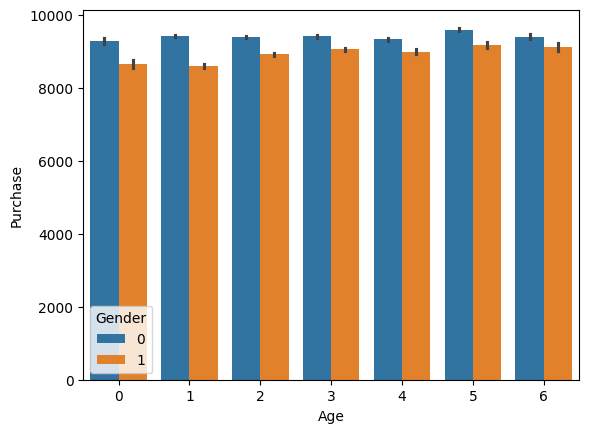

In [89]:
#Visualization

sns.barplot(x='Age', y="Purchase",hue='Gender',data=df)

**Male Purchases is more than female across all** **ages**

<Axes: xlabel='Occupation', ylabel='Purchase'>

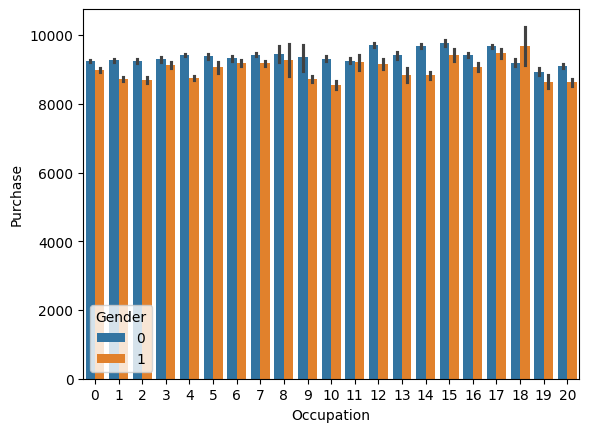

In [90]:
#Visualization

sns.barplot(x='Occupation', y="Purchase",hue='Gender',data=df)

In [91]:
#feature scaling
df_train = df[df['Purchase'].isnull()]
df_test = df[~df['Purchase'].isnull()]

In [98]:
X = df_train.drop(['Purchase','Product_ID'],axis=1)
y = df_train['Purchase']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)